# Trying out Hough projection

In [167]:
# Global imports and settings (from Gilles)

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

Generating a list of points in a plane, belonging to n lines. The number of lines is determined by the "labels" list

In [189]:
# Generating datasets for lines, our data will be a list of 2D points...
def createLine():
    
    p = (np.random.rand(1,2) -0.5) * 5
    print "Created line with params:", p
    print  "Slope = ", np.arctan(p[0,1])
    x = np.linspace(-10, 10, 20)
    y = p[0,0] + x * p[0,1]
    
    X = np.transpose(np.vstack((x, y)))
    return X


def createLabeledLine(label):
    X = createLine()
    y = np.array([ label ] * X.shape[0])
    return X,y
    

def createTrackSet(labels):
    hits = np.empty((0, 2))
    track = None
    for c in labels:
        (X, y) = createLabeledLine(c)
        hits = np.vstack((hits, X))
        if track == None:
             track = y
        else:
            track = np.hstack((track, y))
            
    # Now shuffling the data
    from sklearn.utils import shuffle
    X, y = shuffle(hits, track)
    return X, y

# Creating our data sets
labels = [ "r"]
X, y = createTrackSet(labels)





Created line with params: [[-0.891 -0.38 ]]
Slope =  -0.363471518812


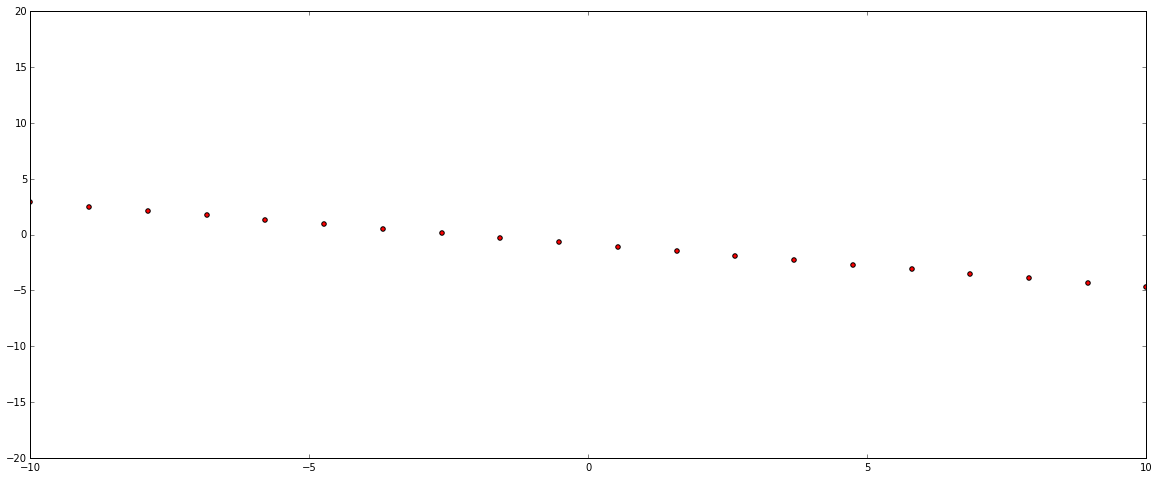

In [190]:
# Printing our tracks to check...
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-20, 20)
plt.axis('on')
plt.savefig("lines.png")
plt.show()


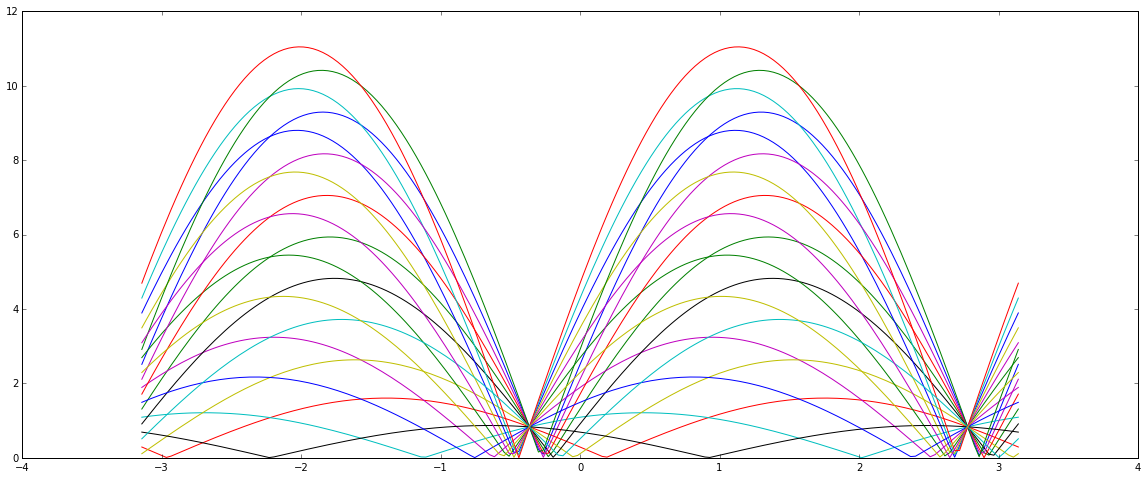

In [191]:
def dist(alpha, xa, ya):
    x = np.sin(alpha) * (xa * np.sin(alpha) - ya * np.cos(alpha))
    y = np.cos(alpha) * (ya * np.cos(alpha) - xa * np.sin(alpha))
    return np.sqrt(x * x + y * y)

alphas = np.linspace(- np.pi, np.pi, 180)
projections = None
for (x,y) in X:
    #print np.vstack((alphas, dist(alphas, x, y)))
    #print x, y
    tmp =  np.transpose(np.vstack((alphas, dist(alphas, x, y))))
    if projections == None:
        projections = tmp
    else:
        projections = np.vstack((projections,  tmp))
    plt.plot(alphas, dist(alphas, x, y))   
        


In [203]:
print projections[:,1]
vals, bins = np.histogram2d(projections[:,0], projections[:, 1], 20)

[ 2.513  2.825  3.134 ...,  2.028  2.161  2.292]


ValueError: too many values to unpack

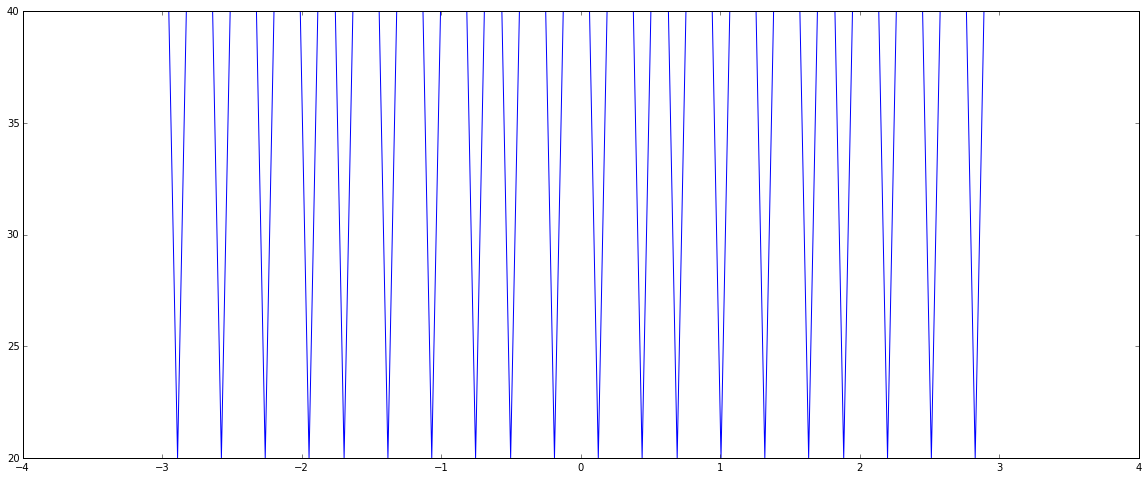

In [197]:
#print vals
#print bins
plt.plot(bins[:-1], vals)